**TASK 1: EDA ANALYSIS**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [6]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [7]:
# Preview the datasets
print("Customers Dataset:")
display(customers.head())
print("\nProducts Dataset:")
display(products.head())
print("\nTransactions Dataset:")
display(transactions.head())

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
# Dataset information - To Check Data Types and So on
print("\nCustomers Dataset Info:")
customers.info()

print("\nProducts Dataset Info:")
products.info()

print("\nTransactions Dataset Info:")
transactions.info()



Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

### DATA CLEANING - CHECK 

In [9]:
# Check for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum(), "\n")
print("Products:\n", products.isnull().sum(), "\n")
print("Transactions:\n", transactions.isnull().sum(), "\n")


Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [10]:
# Summary statistics for numerical features
print("\nSummary Statistics for Transactions Dataset:")
display(transactions.describe())


Summary Statistics for Transactions Dataset:


,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


----

## MERGING DATASETS

In [11]:
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
merged_data['Price'] = merged_data['Price_x']

merged_data


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86,459.86


In [12]:

# Feature engineering for better insights 
merged_data['Price'] = merged_data['Price_x']  # Use a unified 'Price' column
merged_data.drop(columns=['Price_x', 'Price_y'], inplace=True) # Removing Duplicate columns
merged_data


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


---

### VISUALIZING THE INSIGHTS

In [13]:
# Revenue by Region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

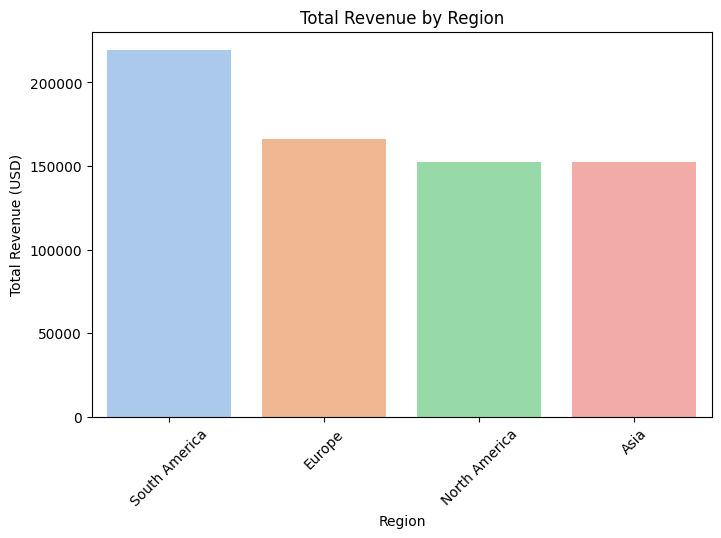

In [14]:
# Bar plot for revenue
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='pastel')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()


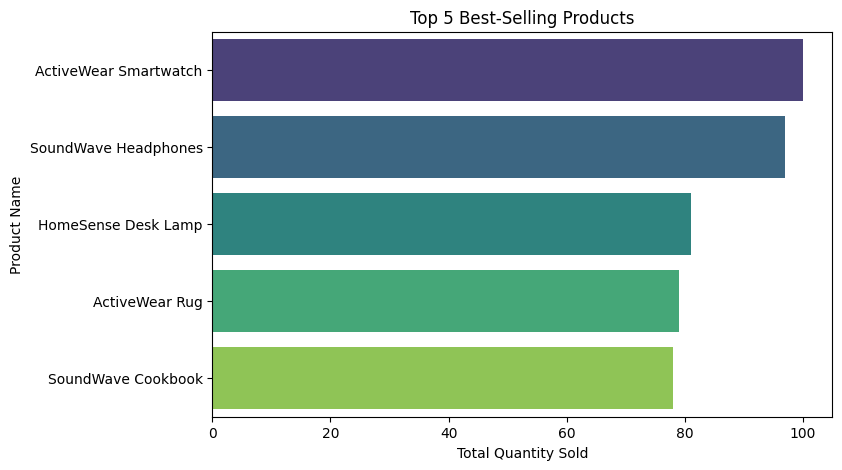

In [15]:
# Top 5 Best-Selling Products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().nlargest(5)

# Bar plot for top products
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

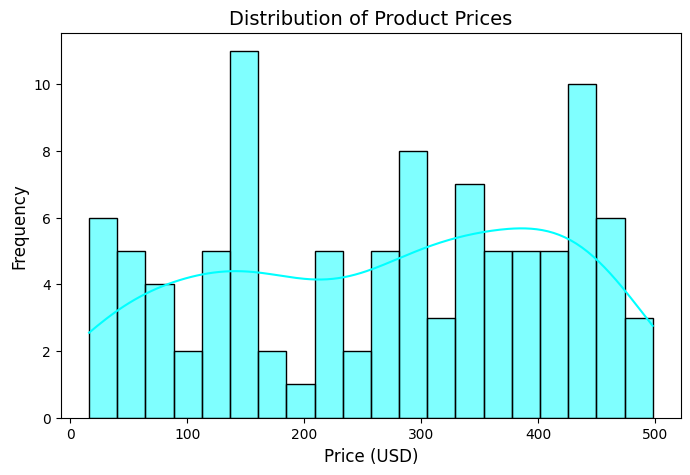

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='cyan')
plt.title('Distribution of Product Prices', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

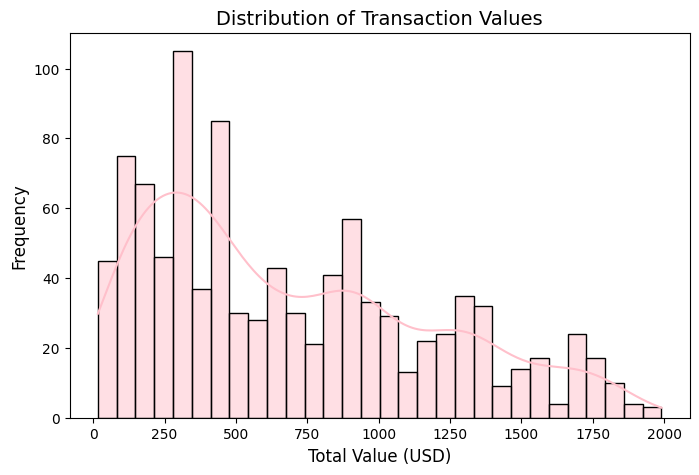

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='pink')
plt.title('Distribution of Transaction Values', fontsize=14)
plt.xlabel('Total Value (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Top 5 Selling Products Based on Revenue Generated:


ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64

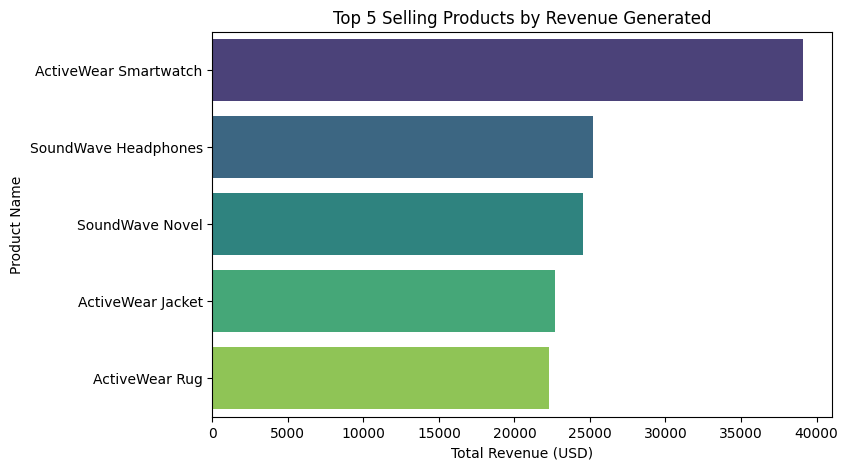

In [18]:
# Calculate total revenue per product
top_5_revenue_products = merged_data.groupby('ProductName')['TotalValue'].sum().nlargest(5)

# Display the top 5 selling products based on revenue
print("Top 5 Selling Products Based on Revenue Generated:")
display(top_5_revenue_products)

# Visualization: Bar plot for top 5 selling products by revenue
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_revenue_products.values, y=top_5_revenue_products.index, palette='viridis')
plt.title('Top 5 Selling Products by Revenue Generated')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product Name')
plt.show()


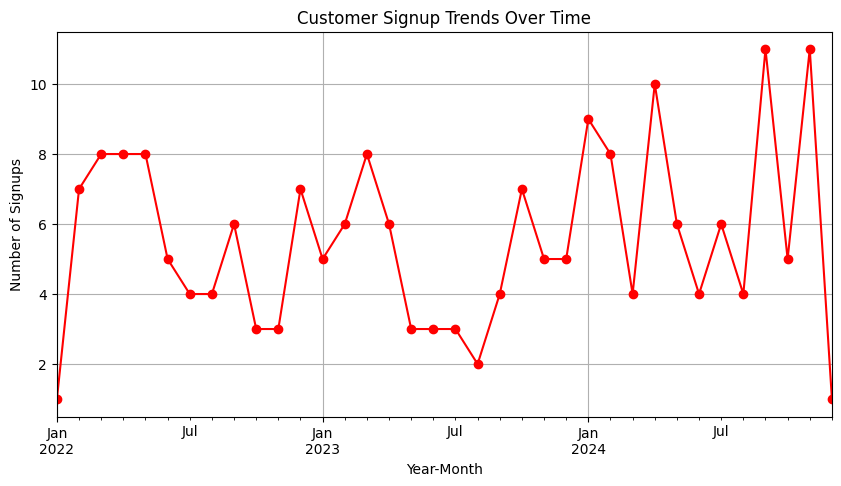

In [19]:
# Customer signup trends over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupYearMonth').size()

# Line plot for trends
plt.figure(figsize=(10, 5))
signup_trends.plot(kind='line', marker='o', color='r')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()

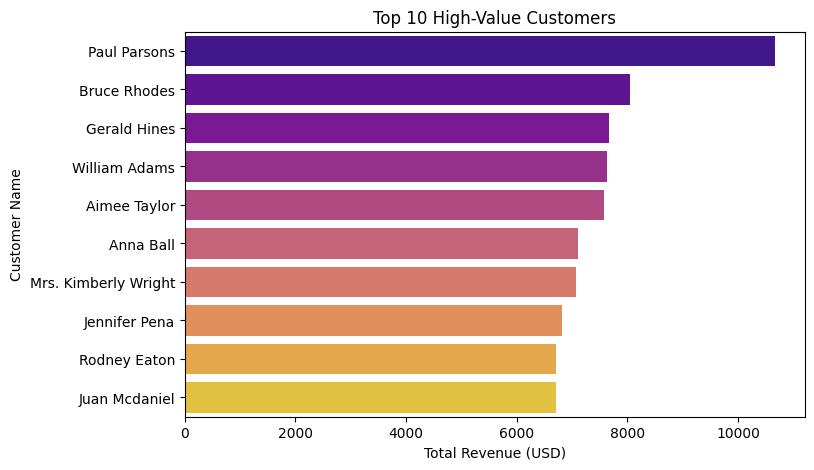

In [20]:
# Top 10 High-Value Customers
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().nlargest(10)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='plasma')
plt.title('Top 10 High-Value Customers')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Customer Name')
plt.show()


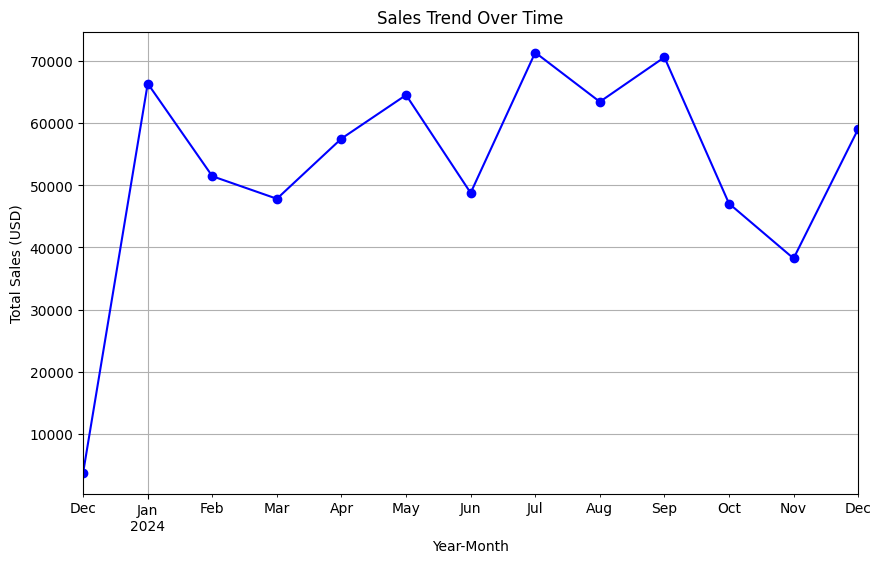

In [21]:
# Ensure TransactionDate is in datetime format
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'], errors='coerce')

# Drop rows with invalid dates (if any)
merged_data = merged_data.dropna(subset=['TransactionDate'])

# Extract year and month for trend analysis
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')

# Aggregate total sales by month
sales_trend = merged_data.groupby('YearMonth')['TotalValue'].sum()

# Plot the sales trend
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.show()


In [22]:
len(merged_data['ProductName'])

1000

Total Revenue: 689995.56
Revenue from Top 5 Products: 133843.50
Top 5 Products Revenue Percentage: 19.40%


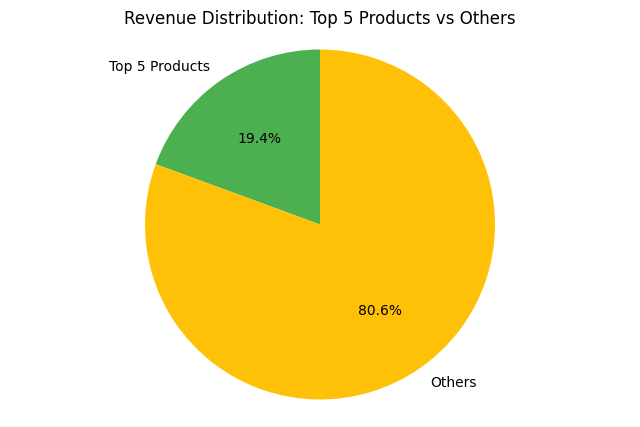

In [23]:
# Calculate total revenue across all transactions
total_revenue = merged_data['TotalValue'].sum()

# Revenue from the top 5 best-selling products
top_5_products_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().nlargest(5).sum()

# Calculate the percentage contribution of top 5 products to total revenue
top_5_percentage = (top_5_products_revenue / total_revenue) * 100

# Display the results
print(f"Total Revenue: {total_revenue:.2f}")
print(f"Revenue from Top 5 Products: {top_5_products_revenue:.2f}")
print(f"Top 5 Products Revenue Percentage: {top_5_percentage:.2f}%")

# Visualization: Compare top 5 products revenue vs total revenue
labels = ['Top 5 Products', 'Others']
values = [top_5_products_revenue, total_revenue - top_5_products_revenue]

# Plot the data
plt.figure(figsize=(8, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'], startangle=90)
plt.title('Revenue Distribution: Top 5 Products vs Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


BIVARIATE ANALYSIS

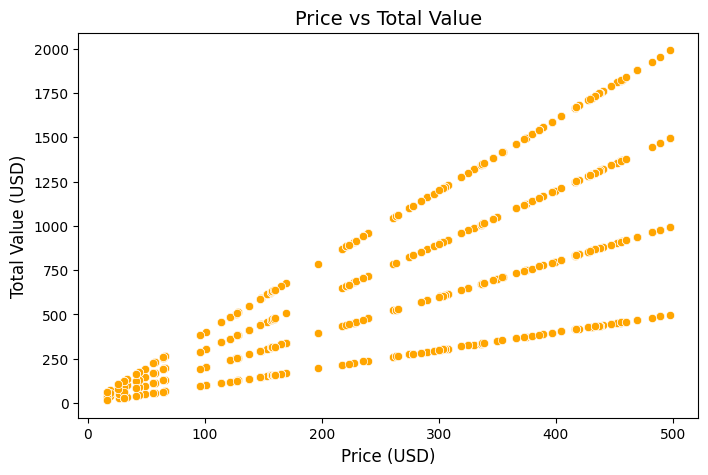

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='Price', y='TotalValue', color='orange')
plt.title('Price vs Total Value', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.show()

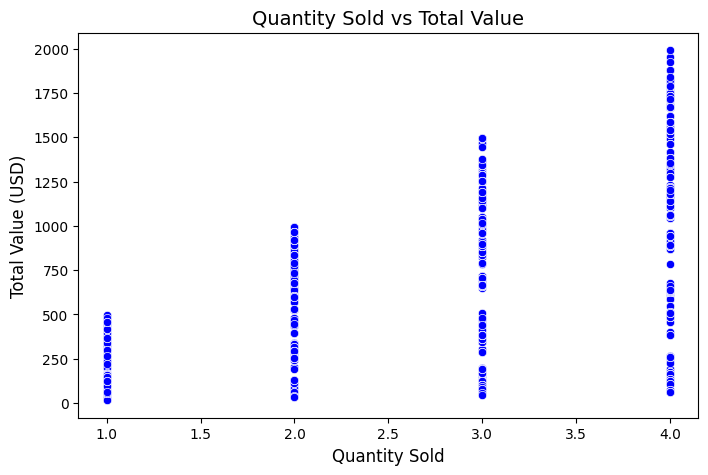

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='Quantity', y='TotalValue', color='blue')
plt.title('Quantity Sold vs Total Value', fontsize=14)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.show()

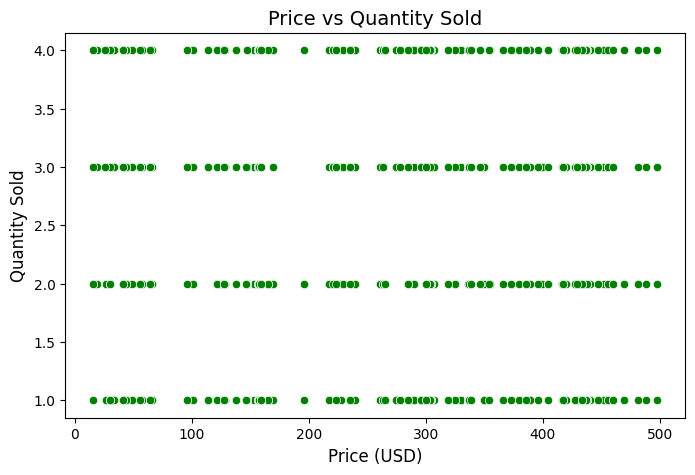

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='Price', y='Quantity', color='green')
plt.title('Price vs Quantity Sold', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.show()

MULTIVARIATE ANALYSIS

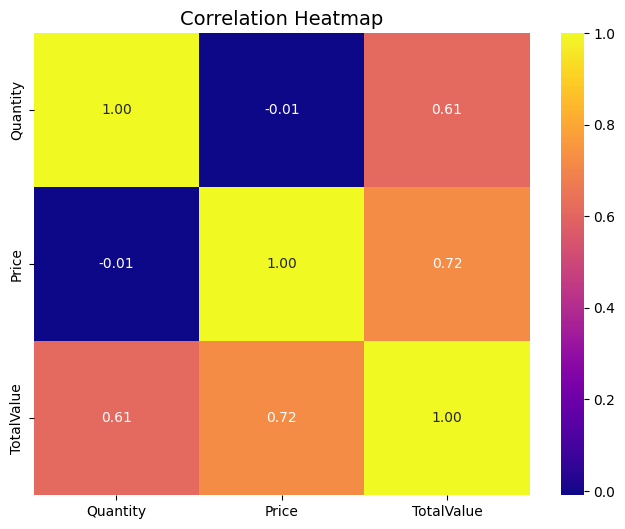

In [27]:
correlation_matrix = transactions[['Quantity', 'Price', 'TotalValue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

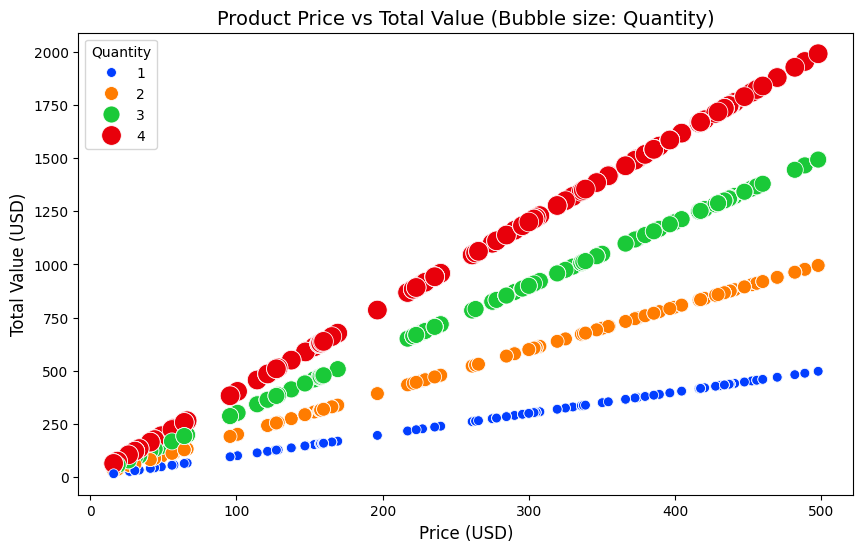

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x='Price', y='TotalValue', size='Quantity', hue='Quantity', palette='bright', sizes=(50, 200))
plt.title('Product Price vs Total Value (Bubble size: Quantity)', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.show()

# EDA Analysis

---

## Key Insights from EDA

### 1. Revenue by Region
- **South America**: 27.8%
- **Europe:** 21.1%
- **North America:** 19.3%
- **Asia:** 19.2%

### 2. Best-Selling Products
- The **Top 5 products** contributed to nearly **20% of total sales**, indicating heavy reliance on a few items.
- To minimize risks, **diversifying the product portfolio** is recommended to maintain stable revenue across categories.

| Product Name            | Total Revenue (USD) |
|-------------------------|---------------------|
| ActiveWear Smartwatch    | 39,096.97           |
| SoundWave Headphones    | 25,211.64           |
| SoundWave Novel         | 24,507.90           |
| ActiveWear Jacket       | 22,712.56           |
| ActiveWear Rug          | 22,314.43           |


### 3. Customer Signup Trends
- **Significant spikes in customer signups** during certain months highlight the success of specific campaigns or **seasonal trends**.
- This insight can guide the timing of **future campaigns**, ensuring consistent customer acquisition.

- **SIGNUP Trend Peaks during last phase of 2024** : (Follow the same strategy to increase sign up trend (may be like seasonal offers))


---
